### General advice (delete this cell before submitting for review)

> * Remove the "**Sign up to the DEA Sandbox** to run this notebook interactively from a browser" header text if the notebook is not DEA Sandbox-compatible or if it is not synced to the DEA Sandbox (e.g. `Scientific_workflows` notebooks)
> * Update the **Compatibility** line depending on whether the notebook is compatible with the `NCI` and `DEA Sandbox` environments (e.g. "Notebook currently compatible with the `DEA Sandbox` environment only" or "Notebook currently compatible with the `NCI` environment only")
> * When adding **Products used**, embed the hyperlink to that specific product on the DEA Explorer using the `[product_name](product url)` syntax.
> * When writing in Markdown cells, start each sentence on a **new line**.
This makes it easy to see changes through git commits.
> * Use Australian English in markdown cells and code comments.
> * Check the [known issues](https://github.com/GeoscienceAustralia/dea-docs/wiki/Known-issues) for formatting regarding the conversion of notebooks to DEA docs using Sphinx.
Things to be aware of:
    * Sphinx is highly sensitive to bulleted lists:
        * Ensure that there is an empty line between any preceding text and the list
        * Only use the `*` bullet (`-` is not recognised)
        * Sublists must be indented by 4 spaces
    * Two kinds of formatting cannot be used simultaneously:
        * Hyperlinked code: \[\`code_format\`](hyperlink) fails
        * Bolded code: \*\*\`code_format\`\*\* fails
    * Headers must appear in heirachical order (`#`, `##`, `###`, `####`) and there can only be one title (`#`).
> * Use the [PEP8 standard](https://www.python.org/dev/peps/pep-0008/) for code. To make sure all code in the notebook is consistent, you can use the `jupyterlab_code_formatter` tool: select each code cell, then click `Edit` and then one of the `Apply X Formatter` options (`YAPF` or `Black` are recommended). This will reformat the code in the cell to a consistent style.
> * For additional guidance, refer to the style conventions and layouts in approved `develop` branch notebooks. 
Examples include
    * [Frequently_used_code/Using_load_ard.ipynb](./Frequently_used_code/Using_load_ard.ipynb)
    * [Real_world_examples/Coastal_erosion.ipynb](./Real_world_examples/Coastal_erosion.ipynb)
    * [Scripts/dea_datahandling.py](./Scripts/dea_datahandling.py)
> * In the final notebook cell, include a set of relevant tags which are used to build the DEA User Guide's [Tag Index](https://docs.dea.ga.gov.au/genindex.html). 
Use all lower-case (unless the tag is an acronym), separate words with spaces (unless it is the name of an imported module), and [re-use existing tags](https://github.com/GeoscienceAustralia/dea-notebooks/wiki/List-of-tags).
Ensure the tags cell below is in `Raw` format, rather than `Markdown` or `Code`.


# Introduction to DEA Land Cover <img align="right" src="../Supplementary_data/dea_logo.jpg">

* [**Sign up to the DEA Sandbox**](https://docs.dea.ga.gov.au/setup/sandbox.html) to run this notebook interactively from a browser
* **Compatibility:** Notebook currently compatible with both the `NCI` and `DEA Sandbox` environments
* **Products used:** 
[ga_ls_landcover_class_cyear_2](https://explorer.sandbox.dea.ga.gov.au/ga_ls_landcover_class_cyear_2)


## Background
An *optional* overview of the scientific, economic or environmental management issue or challenge being addressed by Digital Earth Australia. 
For `Beginners_Guide` or `Frequently_Used_Code` notebooks, this may include information about why the particular technique or approach is useful or required. 
If you need to cite a scientific paper or link to a website, use a persistent DOI link if possible and link in-text (e.g. [Dhu et al. 2017](https://doi.org/10.1080/20964471.2017.1402490)).

## Background
Land cover is the observed physical cover on the Earth's surface including trees, shrubs, grasses, soils, exposed rocks, water bodies, plantations, crops and built structures. A consistent, Australia-wide land cover product helps the understanding of how the different parts of the environment change and inter-relate. 

DEA Land Cover provides annual land cover classifications for Australia using the Food and Agriculture Organisation Land Cover Classification System taxonomy Version 2 (Di Gregorio and Jansen, 1998; 2005). This classifies the land cover into six key classes, which are then further detailed in sub-classes as below: 

- Cultivated Terrestrial Vegetation
    - percentage of cover
    - life form
- Natural Terrestrial Vegetation
    - percentage of cover
    - life form
- Natural Aquatic Vegetation
    - percentage of cover
    - life form
    - water seasonality
- Natural Bare
    - percentage of bare
- Aquatic
    - water persistence
- Artificial surfaces 

### Applications
Annual Land Cover information can be used in a number of ways to support the monitoring and management of environments in Australia. It can be applied to management of the natural environment and the agricultural sector by providing details on how the distribution on plants varies year to year. When combined with other data sources such as rainfall and water availability land cover can be used to build a complex understanding of the processes at play in the Australian landscape.  

Land cover can be applied to several potential use cases. These include but are not limited to the following areas in environmental monitoring, the primary industries and the interests and safety of the Australian community: 

**Environmental monitoring**
- Ecosystem mapping 
- Carbon dynamics 
- Erosion management

**Agriculture Sector**
- Monitoring crop responses to water availability 
- Understanding drought impact on vegetation 

**Community interests**
- Map urban expansion within Australia  
- Mapping impacts of natural disasters 
- Bushfire recovery 

## Description
This notebokk will demonstrate how to load DEA Land Cover using Digital Earth Australia. Topics covered include:

1. Inspecting the products and measurements available in the datacube
2. Loading DEA Land Cover data for an area of interest
3. Understanding the land cover classifications and descriptor layers
4. Plotting DEA Land Cover


....Anything else cool I can think of once this is done!!
***

## Getting started

Provide any particular instructions that the user might need, e.g. To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages
Import Python packages that are used for the analysis.


In [1]:
%matplotlib inline

import datacube
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import sys
sys.path.insert(1, '../Tools/')
from dea_tools.plotting import rgb
from matplotlib import colors as mcolours
from dea_tools.plotting import display_map


### Connect to the datacube

Connect to the datacube so we can access DEA data.

In [2]:
dc = datacube.Datacube(app='DEA_Land_Cover')

### List measurements
We can inspect the contents of DEA Land Cover using datacube's `list_measurements` functionality.

The table below lists each of the measurements available in the product and defines what they represent:

The table below lists each of the measurements available in the product. 
It consists of two levels of land cover classification, level3 and level4. Along with seven associated environmental descriptors that feed the level 4 classification.

- `level3`: Classification into the 6 key land cover classes
- `level4`: Level 3 class is combined with environmental descriptors to give a single classification value
- `lifeform_veg_cat_l4a`: The life form of a vegetated area, separating woody from herbaceous
- `canopyco_veg_cat_l4d`: The cover percent of a vegetated area
- `watersea_veg_cat_l4a_au`: The length of time a vegetated area was measured as being inundated
- `waterstt_wat_cat_l4a`: Water State (snow, ice, liquid water), only liquid water is described in this release
- `inttidal_wat_cat_l4a`: Delineates the intertidal zone
- `waterper_wat_cat_l4d_au`: The number of months a water body contained water
- `baregrad_phy_cat_l4d_au`: The percentage of bare in naturally bare areas

In [3]:
dc.list_measurements().loc[['ga_ls_landcover_class_cyear_2']]

name  \
product                       measurement                                        
ga_ls_landcover_class_cyear_2 level3                                    level3   
                              lifeform_veg_cat_l4a        lifeform_veg_cat_l4a   
                              canopyco_veg_cat_l4d        canopyco_veg_cat_l4d   
                              watersea_veg_cat_l4a_au  watersea_veg_cat_l4a_au   
                              waterstt_wat_cat_l4a        waterstt_wat_cat_l4a   
                              inttidal_wat_cat_l4a        inttidal_wat_cat_l4a   
                              waterper_wat_cat_l4d_au  waterper_wat_cat_l4d_au   
                              baregrad_phy_cat_l4d_au  baregrad_phy_cat_l4d_au   
                              level4                                    level4   

                                                       dtype units nodata  \
product                       measurement                                   
ga_ls_landcover_class_cyear_2 level3                   uint8     1      0   
                              lifeform_veg_cat_l4a      int8     1      0   
                              canopyco_veg_cat_l4d      int8     1      0   
                              watersea_veg_cat_l4a_au   int8     1      0   
                              waterstt_wat_cat_l4a      int8     1      0   
                              inttidal_wat_cat_l4a      int8     1      0   
                              waterper_wat_cat_l4d_au   int8     1      0   
                              baregrad_phy_cat_l4d_au   int8     1      0   
                              level4                    int8     1      0   

                                                                     aliases  \
product                       measurement                                      
ga_ls_landcover_class_cyear_2 level3                                     NaN   
                              lifeform_veg_cat_l4a                [lifeform]   
                              canopyco_veg_cat_l4d        [vegetation_cover]   
                              watersea_veg_cat_l4a_au    [water_seasonality]   
                              waterstt_wat_cat_l4a             [water_state]   
                              inttidal_wat_cat_l4a              [intertidal]   
                              waterper_wat_cat_l4d_au    [water_persistence]   
                              baregrad_phy_cat_l4d_au       [bare_gradation]   
                              level4                   [full_classification]   

                                                      flags_definition  \
product                       measurement                                
ga_ls_landcover_class_cyear_2 level3                               NaN   
                              lifeform_veg_cat_l4a                 NaN   
                              canopyco_veg_cat_l4d                 NaN   
                              watersea_veg_cat_l4a_au              NaN   
                              waterstt_wat_cat_l4a                 NaN   
                              inttidal_wat_cat_l4a                 NaN   
                              waterper_wat_cat_l4d_au              NaN   
                              baregrad_phy_cat_l4d_au              NaN   
                              level4                               NaN   

                                                      spectral_definition  
product                       measurement                                  
ga_ls_landcover_class_cyear_2 level3                                  NaN  
                              lifeform_veg_cat_l4a                    NaN  
                              canopyco_veg_cat_l4d                    NaN  
                              watersea_veg_cat_l4a_au                 NaN  
                              waterstt_wat_cat_l4a                    NaN  
                              inttidal_wat_cat_l4a                    NaN  
                   

## Loading data
Now that we know what measurements are available for the product, we can load data from Digital Earth Australia for an example location. Here we have listed all the measurements, however the below query can adapted to be loading only those layers of interest.

In [4]:
#select a center point for an AOI 

#lake George location
point_x, point_y = (-35.1064, 149.4248)


lat = (point_x-0.1, point_x+0.1)
lon = (point_y-0.1, point_y+0.1)

#display area on map
display_map(x=lon, y=lat)


In [5]:
# Set query and load data


query = {
    'y': lat,
    'x': lon,
    'time': ('2017', '2020'),
}

# Load DEA Land Cover data from the datacube
lc = dc.load(product='ga_ls_landcover_class_cyear_2',
             output_crs='EPSG:3577',
             measurements=['level3', 'lifeform_veg_cat_l4a', 'canopyco_veg_cat_l4d', 'watersea_veg_cat_l4a_au',
                           'waterstt_wat_cat_l4a', 'inttidal_wat_cat_l4a', 'waterper_wat_cat_l4d_au', 
                           'baregrad_phy_cat_l4d_au', 'level4'],
             resolution=(25, -25),
             **query)

We can now view the data that we loaded.
The measurements listed under `Data variables` should match the measurements listed in the query above. 

In [6]:
lc

<xarray.Dataset>
Dimensions:                  (time: 4, y: 981, x: 842)
Coordinates:
  * time                     (time) datetime64[ns] 2017-01-01 ... 2020-01-01
  * y                        (y) float64 -3.954e+06 -3.954e+06 ... -3.93e+06
  * x                        (x) float64 1.59e+06 1.59e+06 ... 1.569e+06
    spatial_ref              int32 3577
Data variables:
    level3                   (time, y, x) uint8 112 112 112 112 ... 112 112 112
    lifeform_veg_cat_l4a     (time, y, x) int8 1 1 1 1 1 1 1 1 ... 2 2 1 1 1 1 1
    canopyco_veg_cat_l4d     (time, y, x) int8 12 12 12 12 12 ... 12 12 12 12 12
    watersea_veg_cat_l4a_au  (time, y, x) int8 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    waterstt_wat_cat_l4a     (time, y, x) int8 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    inttidal_wat_cat_l4a     (time, y, x) int8 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    waterper_wat_cat_l4d_au  (time, y, x) int8 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    baregrad_phy_cat_l4d_au  (time, y, x) int8 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    level4                   (time, y, x) int8 28 28 28 28 28 ... 28 28 28 28 28
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

### Plotting data

Being categorical data, each of the variables is best visualised with custom colour schemes.

The below function `plot layer` will create a categorical colour map for the provided dictionary and use it to 

In [7]:
# plot layer from colour map
def plot_layer(colours, data):
    colour_arr = []
    cblabels = []
    for key, value in colours.items():
        colour_arr.append(np.array(value[:-2])/255)
        cblabels.append(value[-1])

    cmap = mcolours.ListedColormap(colour_arr)
    bounds = list(colours)
    bounds.append(255)
    norm = mcolours.BoundaryNorm(np.array(bounds) - 0.1, cmap.N)

    # plot the provided layer
    im = data.plot(cmap=cmap, norm=norm, add_colorbar=True, col='time', col_wrap=4, size=5)

    cb = im.cbar
    ticks = cb.get_ticks()
    cb.set_ticks(ticks + np.diff(ticks, append=256) / 2)
    cb.set_ticklabels(cblabels)    
    
    return im

#### Level 3 visualisation

First we define a colour scheme for the variable we're wanting to visualise. 
The key's in the below dictionary are the classification values for the level 3 layer, and the following value consists of colour specifications (red, green, blue, alpha) for each class as well as a description to be used in the legend

In [8]:
LEVEL3_COLOUR_SCHEME = { 0   : (255, 255, 255, 255, "No Data"),
                         111 : (172, 188, 45, 255, "Cultivated Terrestrial Vegetation"),
                         112 : (14, 121, 18, 255, "Natural Terrestrial Vegetation"),
                         124 : (30, 191, 121, 255, "Natural Aquatic Vegetation"),
                         215 : (218, 92, 105, 255, "Artificial Surface"),
                         216 : (243, 171, 105, 255, "Natural Bare Surface"),
                         220 : (77, 159, 220, 255, "Water")}

Now we can plot the level 3 layers which were loaded

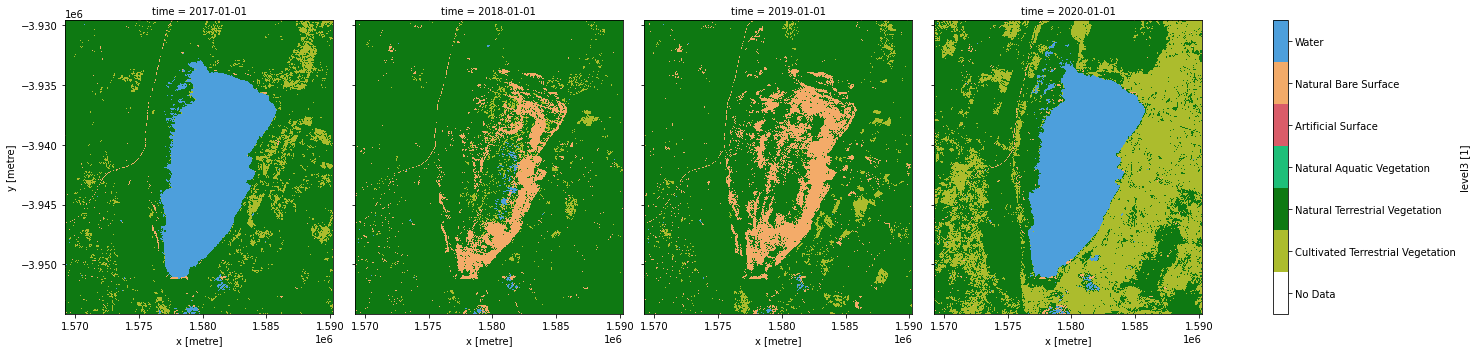

In [9]:
plot_layer(LEVEL3_COLOUR_SCHEME, lc.level3)

#### Lifeform visualisation

As above, we first define a colour scheme for the variable we're wanting to visualise. 

In [10]:
LIFEFORM_COLOUR_SCHEME = { 0   : (255, 255, 255, 255, "No Data / Not vegetated"),
                         1 : (14, 121, 18, 255, "Woody Vegetation"),
                         2 : (172, 188, 45, 255, "Herbaceous Vegetation")}

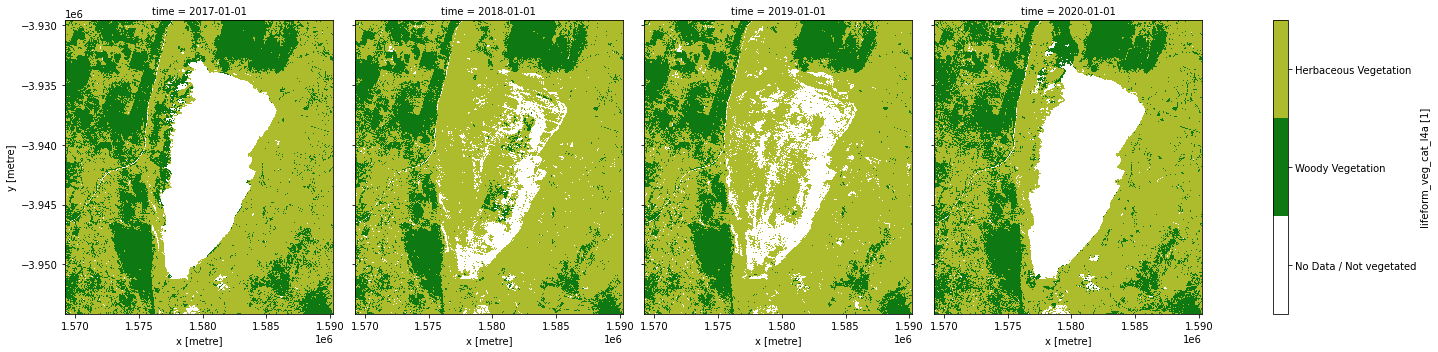

In [11]:
# plot the layer with its provided colour scheme
plot_layer(LIFEFORM_COLOUR_SCHEME, lc.lifeform_veg_cat_l4a)

#### vegetation cover visualisation

In [12]:
# define a colour scheme for the variable we're wanting to visualise. 
COVER_COLOUR_SCHEME =  { 0  : (255, 255, 255, 255, "No Data / Not vegetated"),
                         10 : (14,  121, 18,  255, "> 65 % cover"),
                         12 : (45,  141, 47,  255, "40 to 65 % cover"),
                         13 : (80,  160, 82,  255, "15 to 40 % cover"),
                         15 : (117, 180, 118, 255, "4 to 15 % cover"),
                         16 : (154, 199, 156, 255, "1 to 4 % cover")}

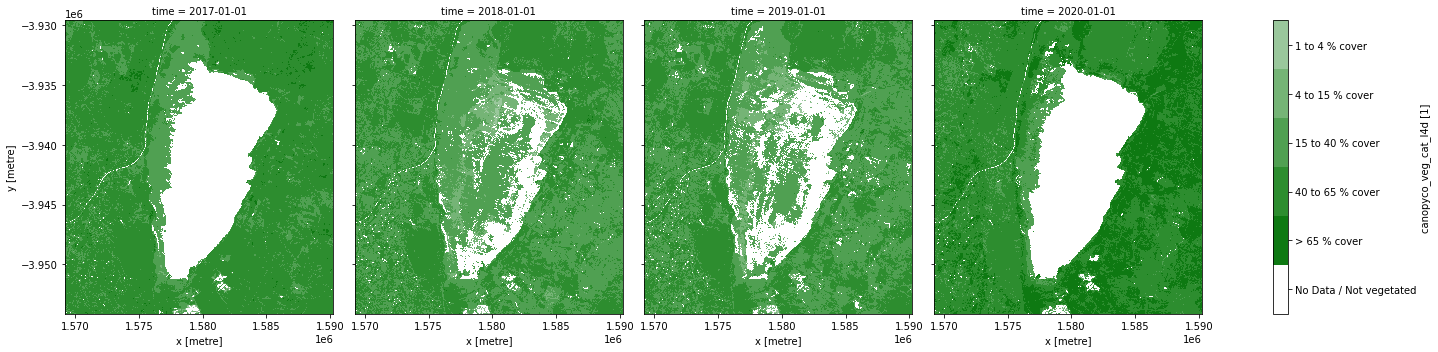

In [13]:
# plot the layer with its provided colour scheme
plot_layer(COVER_COLOUR_SCHEME, lc.canopyco_veg_cat_l4d)

#### water seasonality visualisation

In [14]:
# define a colour scheme for the variable we're wanting to visualise. 
WATERSEA_COLOUR_SCHEME =  { 0 : (255, 255, 255, 255, "No Data / Not aquatic veg"), 
                            1 : (25,  173, 109, 255, "> 3 months"),
                            2 : (176, 218, 201, 255, "< 3 months")
                          }

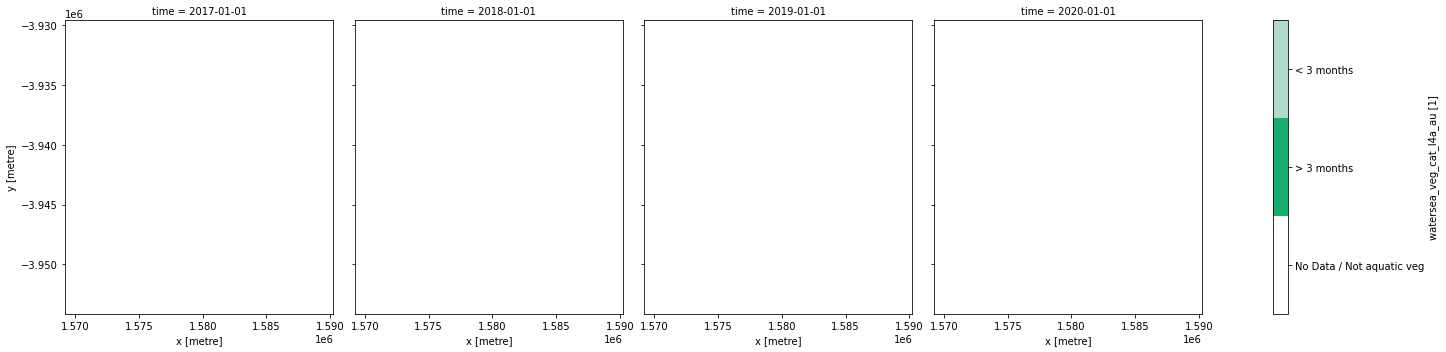

In [15]:
# plot the layer with its provided colour scheme
plot_layer(WATERSEA_COLOUR_SCHEME, lc.watersea_veg_cat_l4a_au)

As water seasonlity only relates to we vegetation, it's hard to see the seasonality changes at this scale.
We can easily 'zoom in' a little

IndexError: index -1 is out of bounds for axis 0 with size 0

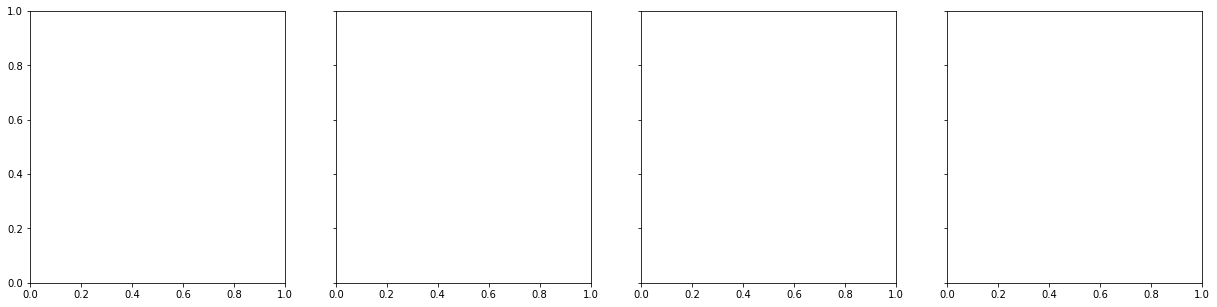

In [16]:
plot_layer(WATERSEA_COLOUR_SCHEME, lc.watersea_veg_cat_l4a_au[:,1250:1500,1150:1400])

#### water state visualisation
As we're only mapping liquid water in this version, this layer is currently a water layer

In [ ]:
# define a colour scheme for the variable we're wanting to visualise. 
WATERSTT_COLOUR_SCHEME =  { 0 : (255, 255, 255, 255, "No Data / Not water"), 
                            1 : (77, 159, 220, 255, "water"),
                          }

plot_layer(WATERSTT_COLOUR_SCHEME, lc.waterstt_wat_cat_l4a)

#### intertidal visualisation 

In [ ]:
# define a colour scheme for the variable we're wanting to visualise. 
INTTIDAL_COLOUR_SCHEME =  { 0 : (255, 255, 255, 255, "No Data / Not intertidail"), 
                            3 : (77, 159, 220, 255, "intertidal"),
                          }

plot_layer(INTTIDAL_COLOUR_SCHEME, lc.inttidal_wat_cat_l4a)

#### water persistence visualisation 

In [ ]:
# define a colour scheme for the variable we're wanting to visualise. 
WATERPER_COLOUR_SCHEME =  { 0 : (255, 255, 255, 255, "No Data / Not water"), 
                            1 : (27,  85,  186, 255, "> 9 months"),
                            7 : (52,  121, 201, 255, "7 to 9 months"),
                            8 : (79,  157, 217, 255, "4 to 6 months"),
                            9 : (113, 202, 253, 255, "1 to 3 months")
                          }

plot_layer(WATERPER_COLOUR_SCHEME, lc.waterper_wat_cat_l4d_au)

#### bare gradation visualisation

In [ ]:
# define a colour scheme for the variable we're wanting to visualise. 
BAREGRAD_COLOUR_SCHEME =  { 0 : (255, 255, 255, 255, "No Data / Not bare"), 
                            10 : (255, 230, 140, 255, "Sparsely Vegetated"),
                            12 : (250, 210, 110, 255, "Very Sparsely Vegetated"),
                            15 : (243, 171, 105, 255, "Bare Areas, Unvegetated")
                          }

plot_layer(BAREGRAD_COLOUR_SCHEME, lc.baregrad_phy_cat_l4d_au)

## level 4 visualisation


** TODO: find a nicer way to do a legend here... 

In [ ]:
LEVEL4_COLOUR_SCHEME = {
1 : (151, 187, 26, 255, 'Cultivated Terrestrial Vegetated:' ),
2 : (151, 187, 26, 255, 'Cultivated Terrestrial Vegetated: Woody' ),
3 : (209, 224, 51, 255, 'Cultivated Terrestrial Vegetated: Herbaceous' ),
4 : (197, 168, 71, 255, 'Cultivated Terrestrial Vegetated: Closed (> 65 %)' ),
5 : (205, 181, 75, 255, 'Cultivated Terrestrial Vegetated: Open (40 to 65 %)' ),
6 : (213, 193, 79, 255, 'Cultivated Terrestrial Vegetated: Open (15 to 40 %)' ),
7 : (228, 210, 108, 255, 'Cultivated Terrestrial Vegetated: Sparse (4 to 15 %)' ),
8 : (242, 227, 138, 255, 'Cultivated Terrestrial Vegetated: Scattered (1 to 4 %)' ),
9 : (197, 168, 71, 255, 'Cultivated Terrestrial Vegetated: Woody Closed (> 65 %)' ),
10 : (205, 181, 75, 255, 'Cultivated Terrestrial Vegetated: Woody Open (40 to 65 %)' ),
11 : (213, 193, 79, 255, 'Cultivated Terrestrial Vegetated: Woody Open (15 to 40 %)' ),
12 : (228, 210, 108, 255, 'Cultivated Terrestrial Vegetated: Woody Sparse (4 to 15 %)' ),
13 : (242, 227, 138, 255, 'Cultivated Terrestrial Vegetated: Woody Scattered (1 to 4 %)' ),
14 : (228, 224, 52, 255, 'Cultivated Terrestrial Vegetated: Herbaceous Closed (> 65 %)' ),
15 : (235, 232, 84, 255, 'Cultivated Terrestrial Vegetated: Herbaceous Open (40 to 65 %)' ),
16 : (242, 240, 127, 255, 'Cultivated Terrestrial Vegetated: Herbaceous Open (15 to 40 %)' ),
17 : (249, 247, 174, 255, 'Cultivated Terrestrial Vegetated: Herbaceous Sparse (4 to 15 %)' ),
18 : (255, 254, 222, 255, 'Cultivated Terrestrial Vegetated: Herbaceous Scattered (1 to 4 %)' ),
19 : (14, 121, 18, 255, 'Natural Terrestrial Vegetated:' ),
20 : (26, 177, 87, 255, 'Natural Terrestrial Vegetated: Woody' ),
21 : (94, 179, 31, 255, 'Natural Terrestrial Vegetated: Herbaceous' ),
22 : (14, 121, 18, 255, 'Natural Terrestrial Vegetated: Closed (> 65 %)' ),
23 : (45, 141, 47, 255, 'Natural Terrestrial Vegetated: Open (40 to 65 %)' ),
24 : (80, 160, 82, 255, 'Natural Terrestrial Vegetated: Open (15 to 40 %)' ),
25 : (117, 180, 118, 255, 'Natural Terrestrial Vegetated: Sparse (4 to 15 %)' ),
26 : (154, 199, 156, 255, 'Natural Terrestrial Vegetated: Scattered (1 to 4 %)' ),
27 : (14, 121, 18, 255, 'Natural Terrestrial Vegetated: Woody Closed (> 65 %)' ),
28 : (45, 141, 47, 255, 'Natural Terrestrial Vegetated: Woody Open (40 to 65 %)' ),
29 : (80, 160, 82, 255, 'Natural Terrestrial Vegetated: Woody Open (15 to 40 %)' ),
30 : (117, 180, 118, 255, 'Natural Terrestrial Vegetated: Woody Sparse (4 to 15 %)' ),
31 : (154, 199, 156, 255, 'Natural Terrestrial Vegetated: Woody Scattered (1 to 4 %)' ),
32 : (119, 167, 30, 255, 'Natural Terrestrial Vegetated: Herbaceous Closed (> 65 %)' ),
33 : (136, 182, 51, 255, 'Natural Terrestrial Vegetated: Herbaceous Open (40 to 65 %)' ),
34 : (153, 196, 80, 255, 'Natural Terrestrial Vegetated: Herbaceous Open (15 to 40 %)' ),
35 : (170, 212, 113, 255, 'Natural Terrestrial Vegetated: Herbaceous Sparse (4 to 15 %)' ),
36 : (186, 226, 146, 255, 'Natural Terrestrial Vegetated: Herbaceous Scattered (1 to 4 %)' ),
37 : (86, 236, 231, 255, 'Cultivated Aquatic Vegetated:' ),
38 : (61, 170, 140, 255, 'Cultivated Aquatic Vegetated: Woody' ),
39 : (82, 231, 172, 255, 'Cultivated Aquatic Vegetated: Herbaceous' ),
40 : (43, 210, 203, 255, 'Cultivated Aquatic Vegetated: Closed (> 65 %)' ),
41 : (73, 222, 216, 255, 'Cultivated Aquatic Vegetated: Open (40 to 65 %)' ),
42 : (110, 233, 228, 255, 'Cultivated Aquatic Vegetated: Open (15 to 40 %)' ),
43 : (149, 244, 240, 255, 'Cultivated Aquatic Vegetated: Sparse (4 to 15 %)' ),
44 : (187, 255, 252, 255, 'Cultivated Aquatic Vegetated: Scattered (1 to 4 %)' ),
45 : (43, 210, 203, 255, 'Cultivated Aquatic Vegetated: Woody Closed (> 65 %)' ),
46 : (73, 222, 216, 255, 'Cultivated Aquatic Vegetated: Woody Open (40 to 65 %)' ),
47 : (110, 233, 228, 255, 'Cultivated Aquatic Vegetated: Woody Open (15 to 40 %)' ),
48 : (149, 244, 240, 255, 'Cultivated Aquatic Vegetated: Woody Sparse (4 to 15 %)' ),
49 : (187, 255, 252, 255, 'Cultivated Aquatic Vegetated: Woody Scattered (1 to 4 %)' ),
50 : (82, 231, 196, 255, 'Cultivated Aquatic Vegetated: Herbaceous Closed (> 65 %)' ),
51 : (113, 237, 208, 255, 'Cultivated Aquatic Vegetated: Herbaceous Open (40 to 65 %)' ),
52 : (144, 243, 220, 255, 'Cultivated Aquatic Vegetated: Herbaceous Open (15 to 40 %)' ),
53 : (175, 249, 232, 255, 'Cultivated Aquatic Vegetated: Herbaceous Sparse (4 to 15 %)' ),
54 : (207, 255, 244, 255, 'Cultivated Aquatic Vegetated: Herbaceous Scattered (1 to 4 %)' ),
55 : (30, 191, 121, 255, 'Natural Aquatic Vegetated:' ),
56 : (18, 142, 148, 255, 'Natural Aquatic Vegetated: Woody' ),
57 : (112, 234, 134, 255, 'Natural Aquatic Vegetated: Herbaceous' ),
58 : (25, 173, 109, 255, 'Natural Aquatic Vegetated: Closed (> 65 %)' ),
59 : (53, 184, 132, 255, 'Natural Aquatic Vegetated: Open (40 to 65 %)' ),
60 : (93, 195, 155, 255, 'Natural Aquatic Vegetated: Open (15 to 40 %)' ),
61 : (135, 206, 178, 255, 'Natural Aquatic Vegetated: Sparse (4 to 15 %)' ),
62 : (176, 218, 201, 255, 'Natural Aquatic Vegetated: Scattered (1 to 4 %)' ),
63 : (25, 173, 109, 255, 'Natural Aquatic Vegetated: Woody Closed (> 65 %)' ),
64 : (25, 173, 109, 255, 'Natural Aquatic Vegetated: Woody Closed (> 65 %) Water > 3 months (semi-) permenant' ),
65 : (25, 173, 109, 255, 'Natural Aquatic Vegetated: Woody Closed (> 65 %) Water < 3 months (temporary or seasonal)' ),
66 : (53, 184, 132, 255, 'Natural Aquatic Vegetated: Woody Open (40 to 65 %)' ),
67 : (53, 184, 132, 255, 'Natural Aquatic Vegetated: Woody Open (40 to 65 %) Water > 3 months (semi-) permenant' ),
68 : (53, 184, 132, 255, 'Natural Aquatic Vegetated: Woody Open (40 to 65 %) Water < 3 months (temporary or seasonal)' ),
69 : (93, 195, 155, 255, 'Natural Aquatic Vegetated: Woody Open (15 to 40 %)' ),
70 : (93, 195, 155, 255, 'Natural Aquatic Vegetated: Woody Open (15 to 40 %) Water > 3 months (semi-) permenant' ),
71 : (93, 195, 155, 255, 'Natural Aquatic Vegetated: Woody Open (15 to 40 %) Water < 3 months (temporary or seasonal)' ),
72 : (135, 206, 178, 255, 'Natural Aquatic Vegetated: Woody Sparse (4 to 15 %)' ),
73 : (135, 206, 178, 255, 'Natural Aquatic Vegetated: Woody Sparse (4 to 15 %) Water > 3 months (semi-) permenant' ),
74 : (135, 206, 178, 255, 'Natural Aquatic Vegetated: Woody Sparse (4 to 15 %) Water < 3 months (temporary or seasonal)' ),
75 : (176, 218, 201, 255, 'Natural Aquatic Vegetated: Woody Scattered (1 to 4 %)' ),
76 : (176, 218, 201, 255, 'Natural Aquatic Vegetated: Woody Scattered (1 to 4 %) Water > 3 months (semi-) permenant' ),
77 : (176, 218, 201, 255, 'Natural Aquatic Vegetated: Woody Scattered (1 to 4 %) Water < 3 months (temporary or seasonal)' ),
78 : (39, 204, 139, 255, 'Natural Aquatic Vegetated: Herbaceous Closed (> 65 %)' ),
79 : (39, 204, 139, 255, 'Natural Aquatic Vegetated: Herbaceous Closed (> 65 %) Water > 3 months (semi-) permenant' ),
80 : (39, 204, 139, 255, 'Natural Aquatic Vegetated: Herbaceous Closed (> 65 %) Water < 3 months (temporary or seasonal)' ),
81 : (66, 216, 159, 255, 'Natural Aquatic Vegetated: Herbaceous Open (40 to 65 %)' ),
82 : (66, 216, 159, 255, 'Natural Aquatic Vegetated: Herbaceous Open (40 to 65 %) Water > 3 months (semi-) permenant' ),
83 : (66, 216, 159, 255, 'Natural Aquatic Vegetated: Herbaceous Open (40 to 65 %) Water < 3 months (temporary or seasonal)' ),
84 : (99, 227, 180, 255, 'Natural Aquatic Vegetated: Herbaceous Open (15 to 40 %)' ),
85 : (99, 227, 180, 255, 'Natural Aquatic Vegetated: Herbaceous Open (15 to 40 %) Water > 3 months (semi-) permenant' ),
86 : (99, 227, 180, 255, 'Natural Aquatic Vegetated: Herbaceous Open (15 to 40 %) Water < 3 months (temporary or seasonal)' ),
87 : (135, 239, 201, 255, 'Natural Aquatic Vegetated: Herbaceous Sparse (4 to 15 %)' ),
88 : (135, 239, 201, 255, 'Natural Aquatic Vegetated: Herbaceous Sparse (4 to 15 %) Water > 3 months (semi-) permenant' ),
89 : (135, 239, 201, 255, 'Natural Aquatic Vegetated: Herbaceous Sparse (4 to 15 %) Water < 3 months (temporary or seasonal)' ),
90 : (171, 250, 221, 255, 'Natural Aquatic Vegetated: Herbaceous Scattered (1 to 4 %)' ),
91 : (171, 250, 221, 255, 'Natural Aquatic Vegetated: Herbaceous Scattered (1 to 4 %) Water > 3 months (semi-) permenant' ),
92 : (171, 250, 221, 255, 'Natural Aquatic Vegetated: Herbaceous Scattered (1 to 4 %) Water < 3 months (temporary or seasonal)' ),
93 : (218, 92, 105, 255, 'Artificial Surface:' ),
94 : (243, 171, 105, 255, 'Natural Surface:' ),
95 : (255, 230, 140, 255, 'Natural Surface: Sparsely vegetated' ),
96 : (250, 210, 110, 255, 'Natural Surface: Very sparsely vegetated' ),
97 : (243, 171, 105, 255, 'Natural Surface: Bare areas, unvegetated' ),
98 : (77, 159, 220, 255, 'Water:' ),
99 : (77, 159, 220, 255, 'Water: (Water)' ),
100 : (187, 220, 233, 255, 'Water: (Water) Tidal area' ),
101 : (27, 85, 186, 255, 'Water: (Water) Perennial (> 9 months)' ),
102 : (52, 121, 201, 255, 'Water: (Water) Non-perennial (7 to 9 months)' ),
103 : (79, 157, 217, 255, 'Water: (Water) Non-perennial (4 to 6 months)' ),
104 : (133, 202, 253, 255, 'Water: (Water) Non-perennial (1 to 3 months)' ),
105 : (250, 250, 250, 255, 'Water: (Snow)' )}

In [ ]:
plot_layer(LEVEL4_COLOUR_SCHEME, lc.level4)

## Change mapping



***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** September 2021

**Compatible datacube version:** 

In [ ]:
print(datacube.__version__)

## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)